In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv("/listings.csv")

In [122]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.66719,-73.81580,Private room,50.0,1,248,2024-02-27,1.94,1,233,50,NaN
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,21,0,NaN
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,125.0,2,292,2024-02-18,2.51,4,360,8,NaN
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.64615,-73.75966,Entire home/apt,105.0,7,337,2024-03-07,3.13,2,79,31,NaN
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,126.0,2,306,2023-12-26,2.87,4,0,5,NaN


In [123]:
df.shape

(404, 18)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              404 non-null    int64  
 1   name                            404 non-null    object 
 2   host_id                         404 non-null    int64  
 3   host_name                       404 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   404 non-null    object 
 6   latitude                        404 non-null    float64
 7   longitude                       404 non-null    float64
 8   room_type                       404 non-null    object 
 9   price                           350 non-null    float64
 10  minimum_nights                  404 non-null    int64  
 11  number_of_reviews               404 non-null    int64  
 12  last_review                     362 

In [125]:
df.isna().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group               404
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                              54
minimum_nights                      0
number_of_reviews                   0
last_review                        42
reviews_per_month                  42
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           404
dtype: int64

In [126]:
df.isna().mean()

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.133663
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.103960
reviews_per_month                 0.103960
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           1.000000
dtype: float64

In [127]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

# **Understand how to handle Missing Values 🧩🔍🧹🔧**

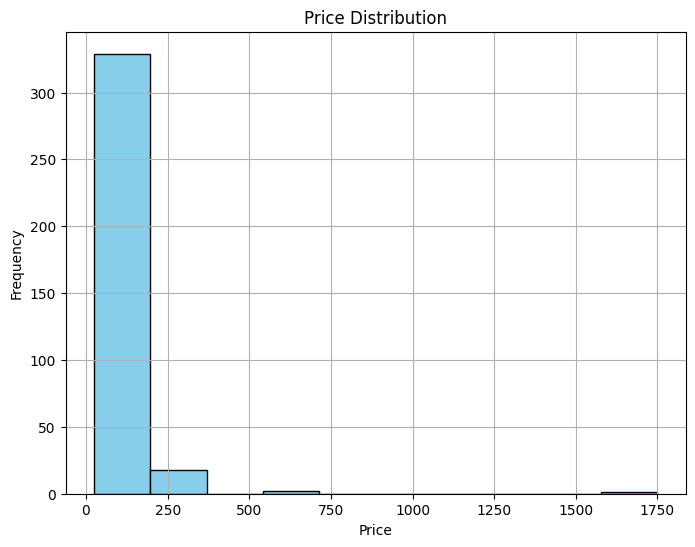

In [128]:
#@title Distribution of Price
# Plotting the histogram
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(df["price"], bins=10, color='skyblue', edgecolor='black')  # Adjust number of bins as needed
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


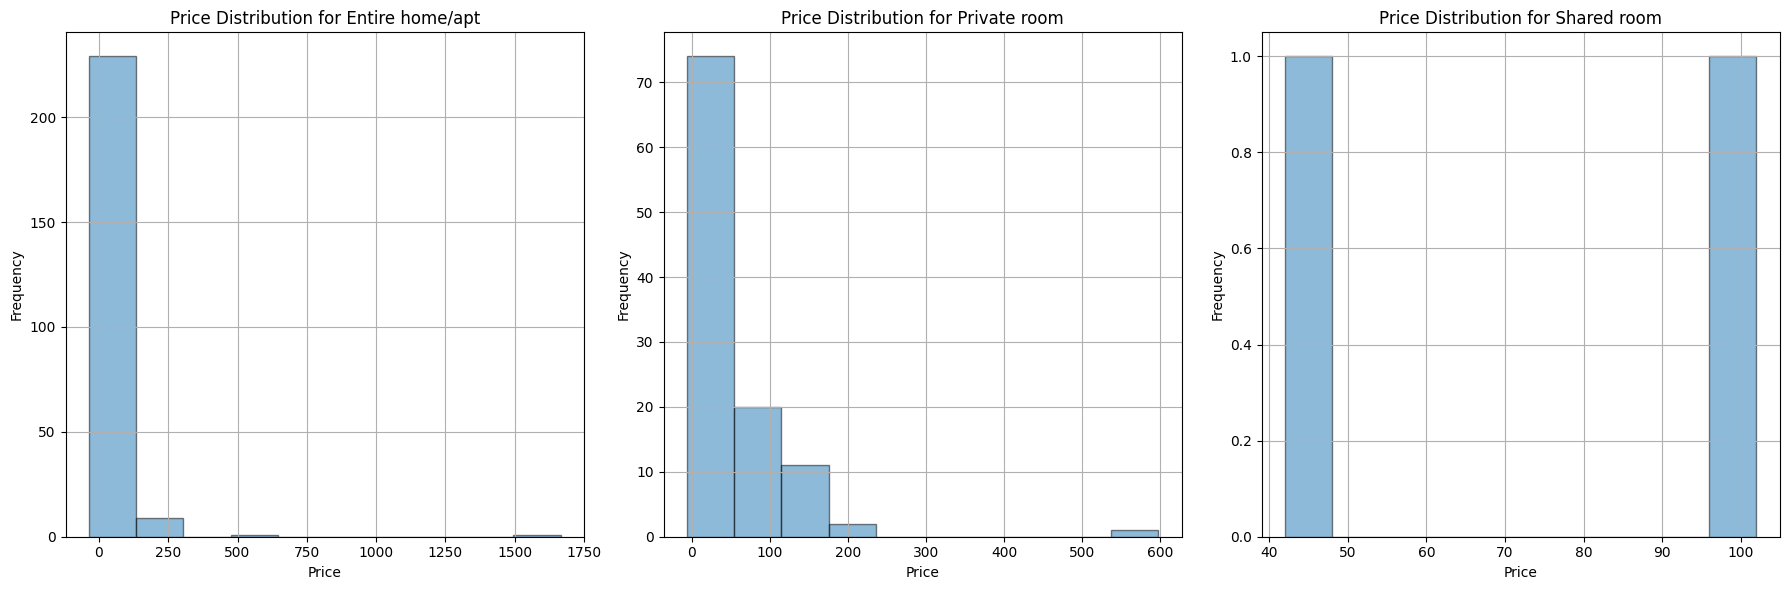

In [129]:
# Grouping by room_type and price
price_each_roomType = df.groupby('room_type')['price']

# Create separate plots for each room type horizontally
fig, axs = plt.subplots(1, len(price_each_roomType), figsize=(6*len(price_each_roomType), 6))

for i, (room_type, group) in enumerate(price_each_roomType):
    axs[i].hist(group, bins=10, alpha=0.5, edgecolor = "black", align= "left")
    axs[i].set_title(f'Price Distribution for {room_type}')
    axs[i].set_xlabel('Price')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [130]:
df["room_type"].value_counts()

room_type
Entire home/apt    287
Private room       115
Shared room          2
Name: count, dtype: int64

In [131]:
df[df["price"].isna()]["room_type"].value_counts()

room_type
Entire home/apt    47
Private room        7
Name: count, dtype: int64

In [132]:
# No review so that no date found, no review, reviews_per_month=0, no last_review
df[(df["number_of_reviews"] == df["number_of_reviews_ltm"]) & (df["number_of_reviews"] ==0)].isna().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group               42
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             17
minimum_nights                     0
number_of_reviews                  0
last_review                       42
reviews_per_month                 42
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
license                           42
dtype: int64

In [133]:
# Convert "last_review" column to datetime data type
df['last_review'] = pd.to_datetime(df['last_review'])

# Extract year, month, and day
df['year'] = df['last_review'].dt.year
df['month'] = df['last_review'].dt.month
df['day'] = df['last_review'].dt.day
# drop last_review col
df.drop(columns = ["last_review"], inplace = True)

In [134]:
#@title **Handling Missing Values**

# neighbourhood_group & license cols are completely null
df.drop(columns = ["license", "neighbourhood_group"], inplace = True)
# fill with median of price based on room_type
median_prices = {
    'Entire home/apt': df[df["room_type"] == "Entire home/apt"]["price"].median(),
    'Private room': df[df["room_type"] == "Private room"]["price"].median(),
}

# Fill null values based on room type
df['price'] = df.apply(lambda x: median_prices[x['room_type']] if pd.isnull(x['price']) else x['price'], axis=1)

# Fill by 0 of reviews_per_month: No review
df.reviews_per_month.fillna(0, inplace = True)
# Fill by -1 to indicate No data
df['year'].fillna(-1, inplace=True)
df['month'].fillna(-1, inplace=True)
df['day'].fillna(-1, inplace=True)


In [135]:
# Number of duplicated rows
df.duplicated().sum()

0

# **Analysis the data 📈🔍📊🔬**

In [136]:
# some statistical info sbout numerical cols
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year,month,day
count,4.040000e+02,4.040000e+02,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,5.075502e+17,2.215851e+08,42.657382,-73.776875,113.363861,5.222772,54.732673,1.785272,5.133663,202.027228,16.022277,1813.042079,4.032178,14.443069
std,4.254315e+17,1.796507e+08,0.009623,0.019607,101.153318,21.515183,98.541437,1.950459,5.436021,131.345837,21.572016,618.665963,3.875411,10.685638
min,1.489424e+06,6.490680e+05,42.630660,-73.876489,24.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,4.662195e+07,4.762598e+07,42.651845,-73.790344,76.750000,1.000000,4.000000,0.340000,1.000000,79.000000,1.000000,2023.000000,2.000000,4.000000
50%,6.686083e+17,1.870609e+08,42.657168,-73.773448,105.000000,2.000000,16.000000,1.080000,3.000000,244.000000,7.000000,2024.000000,2.000000,15.000000
75%,9.022064e+17,3.872668e+08,42.662161,-73.761915,120.500000,3.000000,61.000000,2.602500,6.500000,327.250000,22.000000,2024.000000,7.000000,25.000000
max,1.104977e+18,5.531120e+08,42.714896,-73.738103,1750.000000,365.000000,777.000000,11.080000,22.000000,365.000000,131.000000,2024.000000,12.000000,31.000000


In [137]:
(df.availability_365 == 0).sum()

67

**Some listings may be unavailable due to ⏰:**

<font color = "blue">**1 - Maintenance, weather conditions, or other factors.**

<font color = "blue">**2 - Being currently occupied by other guests or tenants.**



In [138]:
# some info about categorical cols
df.describe(include = "object")

,name,host_name,neighbourhood,room_type
count,404,404,404,404
unique,403,175,15,3
top,Lovely private room in Albany,Diana,SIXTH WARD,Entire home/apt
freq,2,25,88,287


In [139]:
#@title  **Q1 - Average of price of each room type ?**🤑🤑
df.groupby("room_type")["price"].mean()

room_type
Entire home/apt    125.721254
Private room        83.191304
Shared room         75.000000
Name: price, dtype: float64

<font color = "blue">**2 - Private rooms and shared rooms are generally more affordable options.**

<font color = "blue">**1 - Generally, prices of renting Entire home/apt has the highest cost,is possible to be suitable more to whom concern in more privacy and space.**



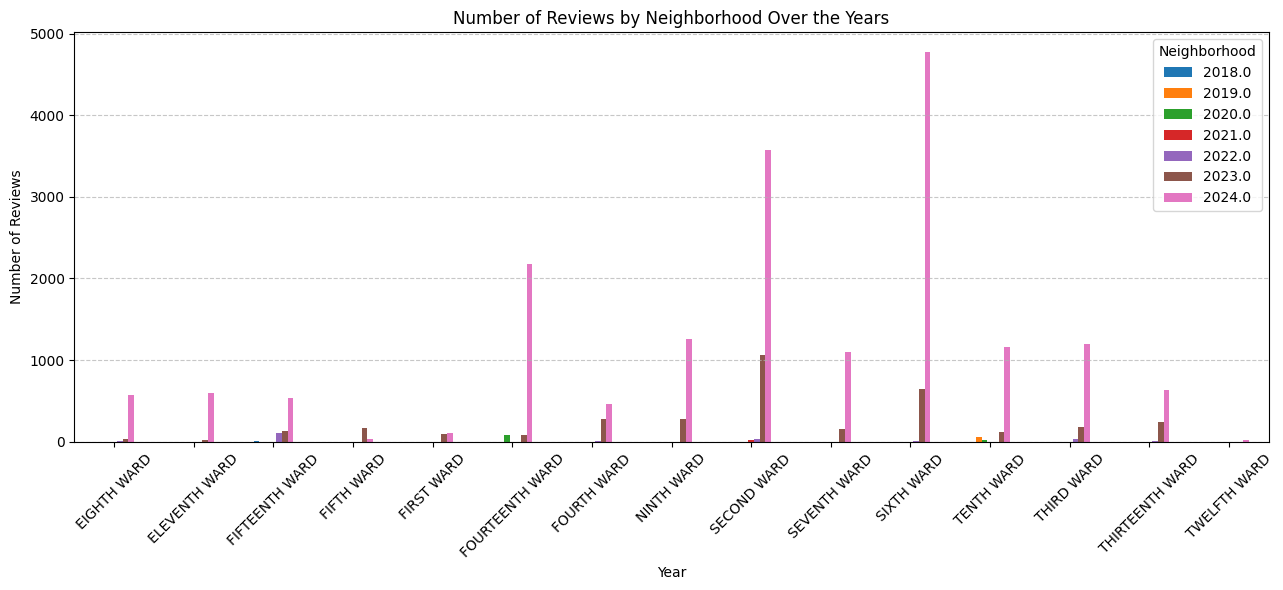

In [151]:
#@title **Q2 - How performance of neighborhood goes During Years? 🔎🔎📈**

dfWithReview = df[df.year != -1]
grouped_df = dfWithReview.groupby(['neighbourhood', 'year'])['number_of_reviews'].sum().unstack()

# Plotting
grouped_df.plot(kind='bar', figsize=(13, 6))
plt.title('Number of Reviews by Neighborhood Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Neighborhood')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<font color = "blue">**Generally, the Demand of different neighborhood is going high during Years, especially in Sixth, Second and Fourteenth Ward.**

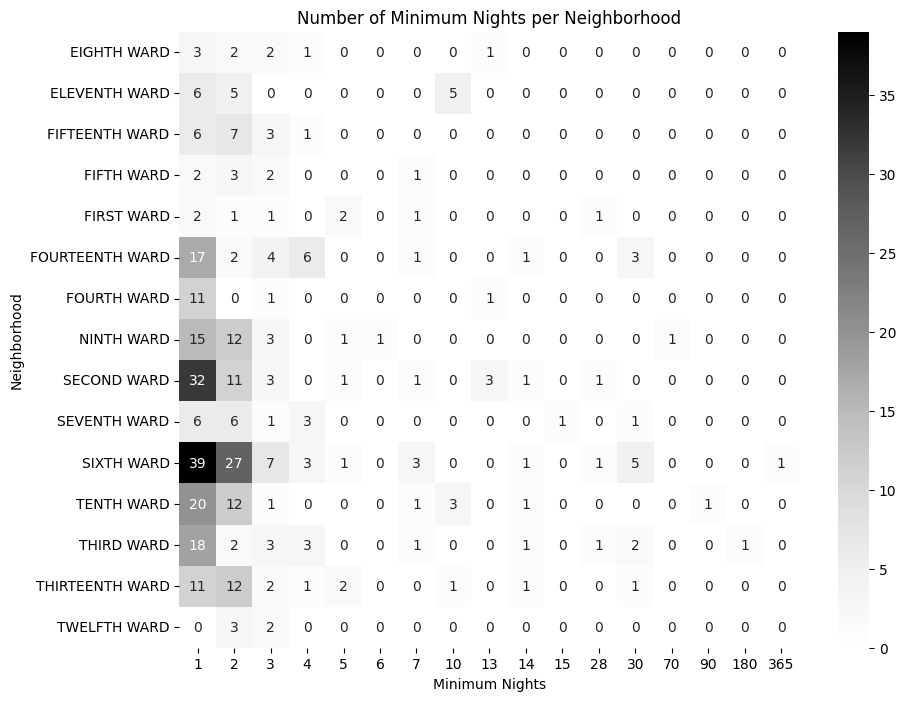

In [141]:
#@title **Q3 - Relationship b/w min_night & Neighborhood  📈🏘️**

# Calculate the crosstab
min_nightPerNeighborhood = pd.crosstab(df["neighbourhood"], df["minimum_nights"])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(min_nightPerNeighborhood, cmap='Greys', annot=True, fmt='d')
plt.title('Number of Minimum Nights per Neighborhood')
plt.xlabel('Minimum Nights')
plt.ylabel('Neighborhood')
plt.show()

<font color = "blue">**Most freuently Min_nights are range (1,3)**

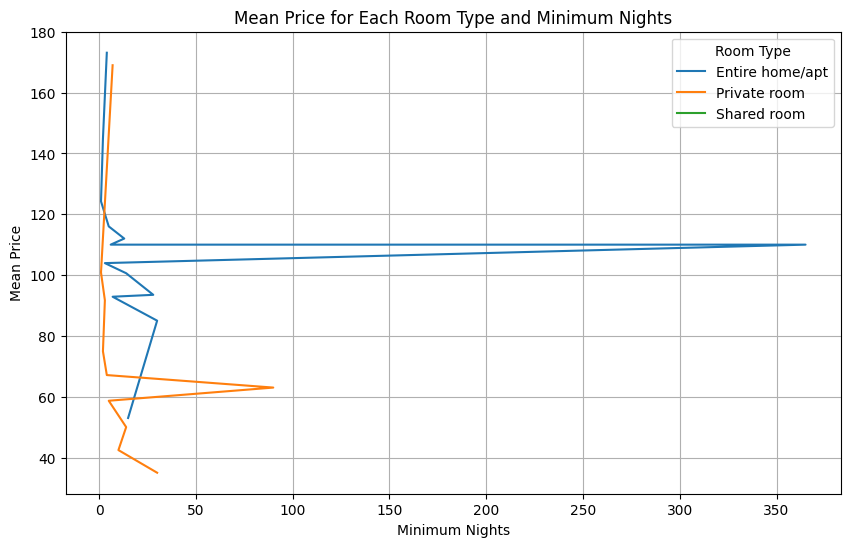

In [142]:
#@title **Q4 - Prices of Each Room_Type for each Min_night**
# Plotting
plt.figure(figsize=(10, 6))

# Group by room_type and minimum_nights and calculate the mean price for each group
result = df.groupby(["room_type", "minimum_nights"])["price"].mean().reset_index()

# Sort the result by room_type and price in descending order
result_sorted = result.sort_values(by=["room_type", "price"], ascending=False)
# Separate the data for each room type
for room_type, data in result_sorted.groupby('room_type'):
    plt.plot(data['minimum_nights'], data['price'], label=room_type)

# Adding labels and legend
plt.title('Mean Price for Each Room Type and Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.grid(True)
plt.show()


**Less Minimum Nights, More Price Paid:**

* <font color = "blue">**Increased Booking Flexibility: Shorter minimum stays offer guests more flexibility, often commanding higher prices.**

* <font color = "blue">**Seasonal Influence: Prices may fluctuate based on seasonal demand, potentially driving up rates during peak periods.**

* <font color = "blue">**Heightened Demand: Listings with shorter minimum nights may experience higher demand, leading to price premiums.**

* <font color = "blue">**Short-Term Stay Premium: Short stays typically incur higher nightly rates compared to longer stays, reflecting their convenience and flexibility.**



<Figure size 1500x1500 with 0 Axes>

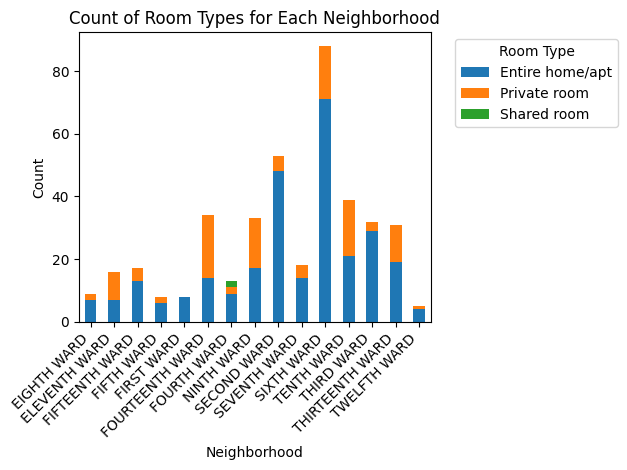

In [143]:
#@title **Q5 - Number of Room_type of each Neighborhood**
# Group by neighbourhood and room_type and count the occurrences
stacked_data = df.groupby(["neighbourhood", "room_type"])["room_type"].count().unstack()

# Plotting
plt.figure(figsize=(15, 15))
stacked_data.plot(kind='bar', stacked=True)
plt.title('Count of Room Types for Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* <font color = "blue">**It ensures that demand for Entire homes is notably the highest in each Ward.**

* <font color = "blue">**Any host interested in investing should focus on entire homes.**

* <font color = "blue">**Families and groups are the most frequent users, indicating higher demand. Hosts can capitalize on this by offering additional features or special offers to encourage recurring rentals.**


* <font color = "blue">**Generally, Entire home can used for accomodation and for trips, but the private or shared rooms often for short activities as trips**

<ipython-input-144-b7261c7f4614>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='minimum_nights', y='count', data=grouped_data, palette='Set2')


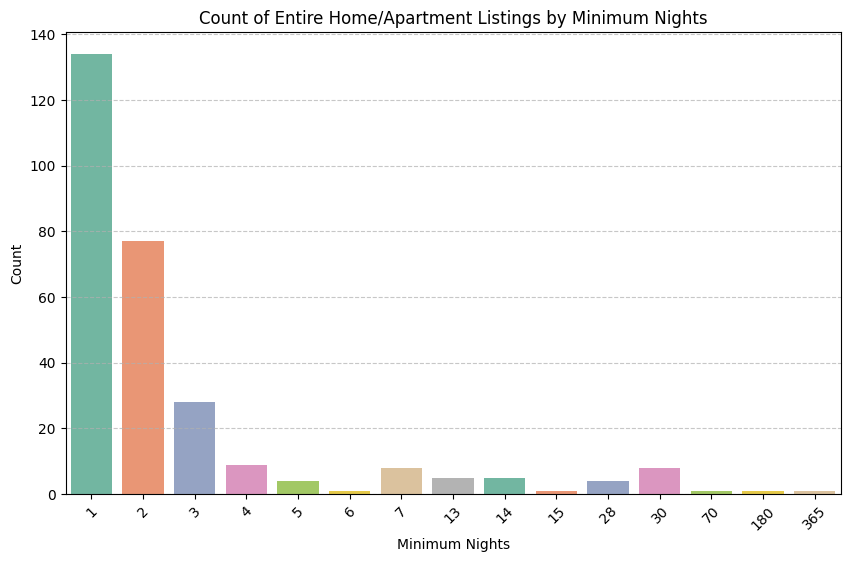

In [144]:
#@title **Q6 - What is most used of Entire home for accomodation (long use) or for trip (short use)?**
# min_nights indicate to min nights the guest must accomodate for booknig
# if min_nights is high and demand on it is high >> Indicator for accomodation

entire_home_df = df[df.room_type == "Entire home/apt"]

# Group by minimum nights and count the occurrences
grouped_data = entire_home_df.groupby("minimum_nights")["minimum_nights"].count().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='minimum_nights', y='count', data=grouped_data, palette='Set2')
plt.title('Count of Entire Home/Apartment Listings by Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<font color = "blue">**Min_nights are mostly range(1,3) in Entire Home that possible to indicate that most user are comming for trip or for short activity.**

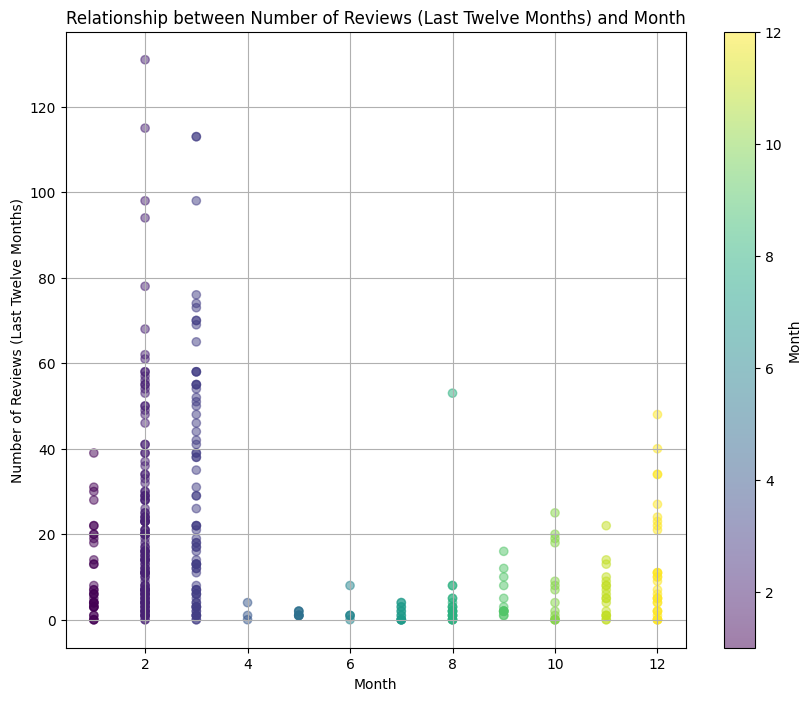

In [157]:
#@title **Relationship b/w number_of_reviews_ltm & reviews_per_month**
plt.figure(figsize=(10, 8))
df_filtered = df[df["month"] != -1]
plt.scatter( df_filtered['month'], df_filtered['number_of_reviews_ltm'], alpha=0.5, c=df_filtered['month'], cmap='viridis')
plt.title('Relationship between Number of Reviews (Last Twelve Months) and Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews (Last Twelve Months)')
plt.colorbar(label='Month')
plt.grid(True)
plt.show()


Number of people use Listings is alot at the start of the year

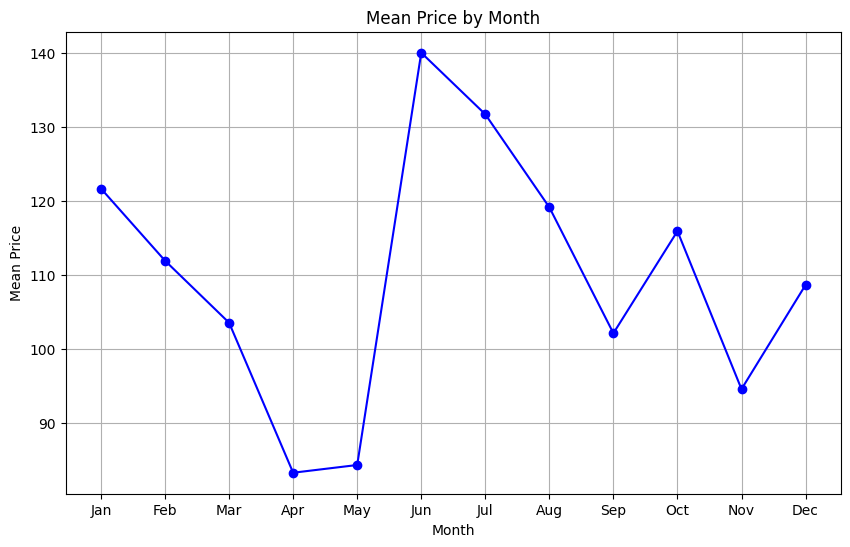

In [150]:
#@title **How Price goes during the months ?**
# Group by month and calculate the mean price
monthly_mean_price = df[df['month'] != -1].groupby('month')['price'].mean().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_price.index, monthly_mean_price.values, marker='o', color='blue', linestyle='-')
plt.title('Mean Price by Month')
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


<font color = "blue">**1 - Typically, the highest prices occur during the summer months, from June to August. This may be attributed to increased demand during the summer season, as well as the rise in outdoor activities and events.**

<font color = "blue">**2 - Prices begin to decline at the start of the year and continue to decrease until the summer season. This could be due to lower demand and reduced activity during the colder months.**

<font color = "blue">**3 - Lowest Prices in Spring: Prices reach their lowest point during the spring season. This may be influenced by discounts and promotional offers aimed at incentivizing bookings and attracting guests as the tourism season picks up.**

In [176]:
df["calculated_host_listings_count"].groupby(df["host_id"]).count().sort_values(ascending=False)[:7]

host_id
232967878    22
47625981     15
526358730    12
382970529    10
152762198     9
4259750       9
37769478      8
Name: calculated_host_listings_count, dtype: int64

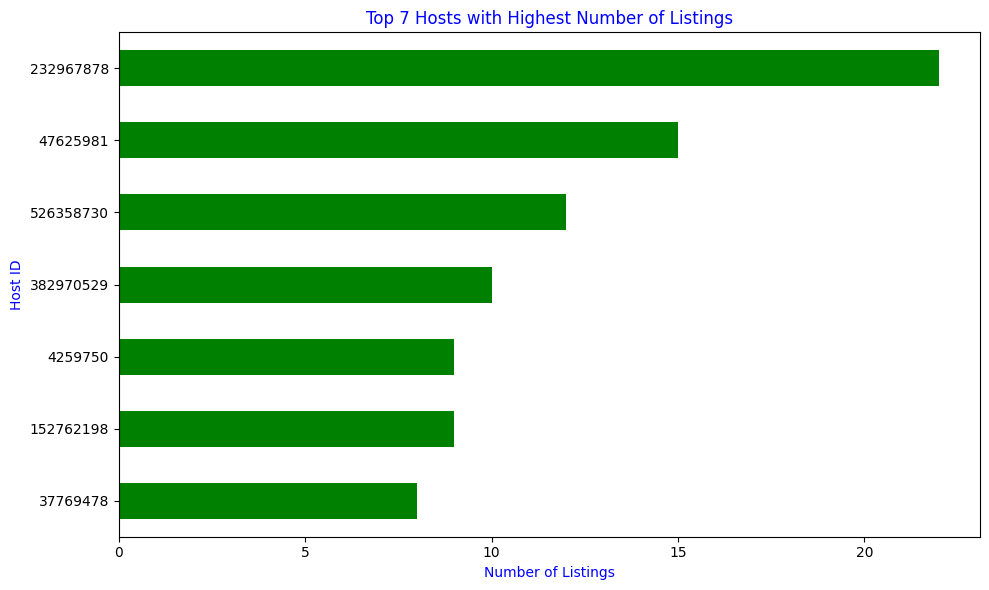

In [175]:
# Grouping by host_id and counting the number of listings, then selecting the top 7 hosts
top_hosts = df["calculated_host_listings_count"].groupby(df["host_id"]).count().sort_values(ascending=False)[:7]

# Plotting
plt.figure(figsize=(10, 6))
top_hosts.sort_values().plot(kind='barh', color='green')
plt.title('Top 7 Hosts with Highest Number of Listings', color='blue')
plt.xlabel('Number of Listings', color='blue')
plt.ylabel('Host ID', color='blue')
plt.tight_layout()
plt.show()

<font color = "blue">**Competition is not high; low number of host has active listings,  The top hosts with the highest number of listings, such as host IDs 232967878, 47625981, and 526358730, demonstrate a significant presence**


In [149]:
df.groupby("neighbourhood")["price"].describe().T

neighbourhood,EIGHTH WARD,ELEVENTH WARD,FIFTEENTH WARD,FIFTH WARD,FIRST WARD,FOURTEENTH WARD,FOURTH WARD,NINTH WARD,SECOND WARD,SEVENTH WARD,SIXTH WARD,TENTH WARD,THIRD WARD,THIRTEENTH WARD,TWELFTH WARD
count,9.000000,16.000000,17.000000,8.000000,8.0000,34.000000,13.000000,33.000000,53.000000,18.000000,88.000000,39.000000,32.000000,31.000000,5.000000
mean,143.333333,82.437500,272.647059,98.625000,129.5000,82.411765,117.923077,110.272727,114.415094,103.944444,106.534091,113.615385,98.406250,103.161290,133.600000
std,94.212526,48.124794,403.530659,19.978113,74.2236,39.711168,37.697174,103.105005,32.433028,57.321049,29.196894,65.610740,27.592495,50.401122,30.574499
min,55.000000,35.000000,39.000000,53.000000,60.0000,26.000000,45.000000,24.000000,61.000000,50.000000,50.000000,45.000000,45.000000,35.000000,103.000000
25%,110.000000,45.000000,88.000000,99.000000,96.2500,56.250000,109.000000,55.000000,97.000000,53.000000,88.750000,61.500000,78.000000,63.000000,110.000000
50%,110.000000,57.500000,160.000000,103.500000,110.0000,75.000000,115.000000,87.000000,110.000000,96.000000,109.000000,100.000000,102.500000,99.000000,125.000000
75%,143.000000,111.000000,243.000000,106.250000,122.2500,103.750000,120.000000,127.000000,120.000000,129.000000,118.250000,161.000000,111.250000,125.500000,155.000000
max,347.000000,184.000000,1750.000000,120.000000,300.0000,185.000000,217.000000,628.000000,249.000000,279.000000,207.000000,364.000000,166.000000,266.000000,175.000000


# Handling Outliers 🔍🧹🤗

In [161]:
df.select_dtypes(include="number").columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'year', 'month', 'day'],
      dtype='object')

In [195]:
num_cols = ['latitude', 'longitude', 'price', 'minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','number_of_reviews_ltm']

In [178]:
high_scale_cols = ["price", "number_of_reviews", "availability_365", "number_of_reviews_ltm"]
small_scale_cols = ['latitude', 'longitude', 'minimum_nights',
            'reviews_per_month', 'calculated_host_listings_count']


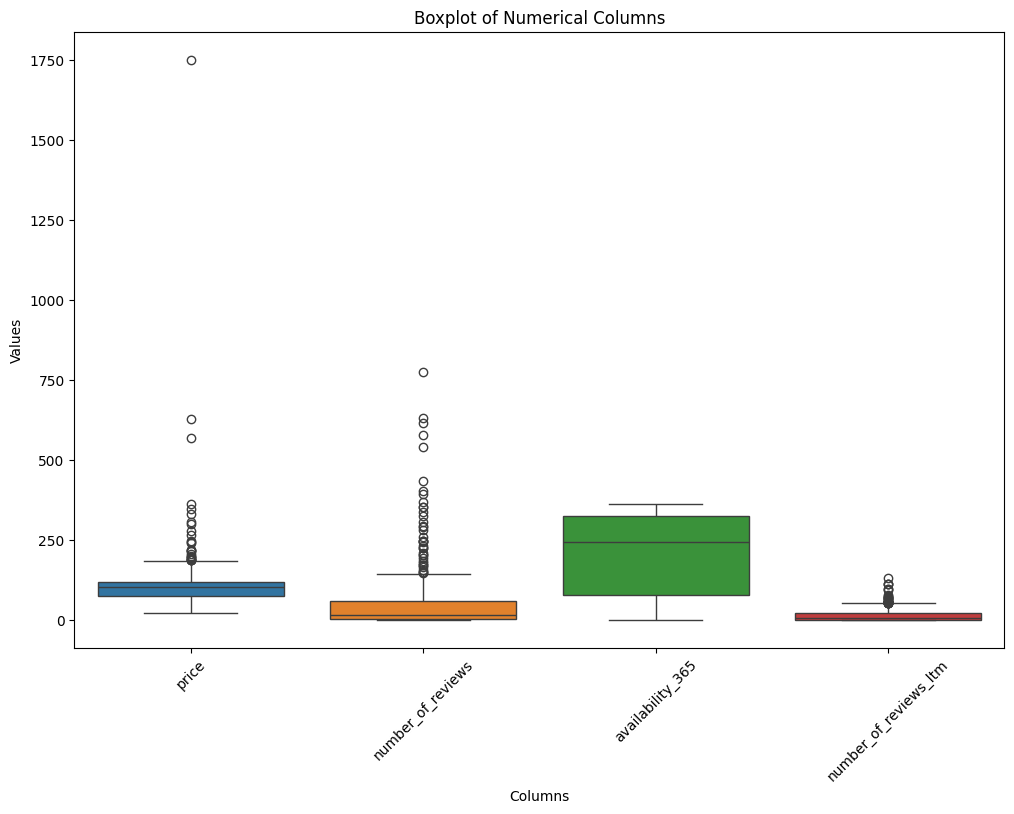

In [179]:
# Plot boxplots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[high_scale_cols])
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

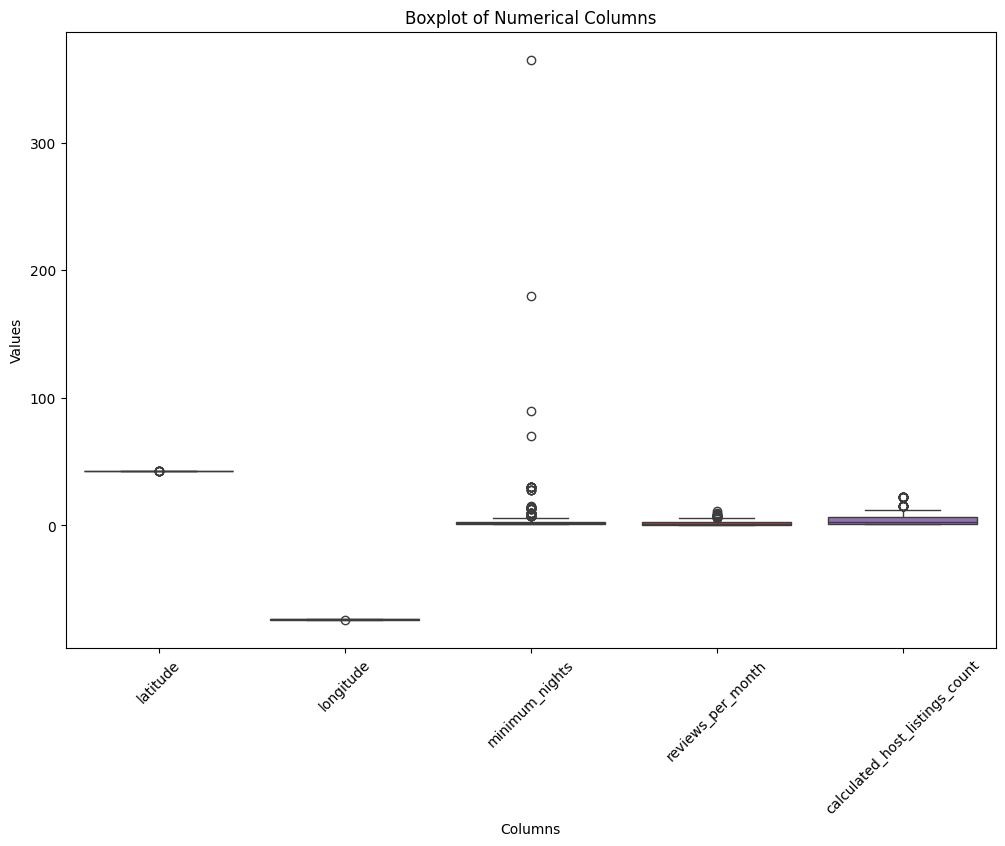

In [180]:
# Plot boxplots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[small_scale_cols])
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [192]:
def detect_outliers(series):
    """
    Detect outliers in a pandas Series using the Interquartile Range (IQR) method.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Define the numerical columns
num_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
            'number_of_reviews_ltm']

# Calculate the number of outliers in each numerical column
outlier_counts = {col: detect_outliers(df[col]) for col in num_cols}
print("Number of outliers in each column:")
result = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)
print(result)

Number of outliers in each column:
[('minimum_nights', 50), ('number_of_reviews', 38), ('calculated_host_listings_count', 37), ('number_of_reviews_ltm', 32), ('price', 27), ('reviews_per_month', 21), ('latitude', 8), ('longitude', 1), ('availability_365', 0)]


<ipython-input-191-4f5daec47ca4>:16: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  plt.tight_layout()
<ipython-input-191-4f5daec47ca4>:16: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  plt.tight_layout()
<ipython-input-191-4f5daec47ca4>:16: UserWarning: Glyph 127811 (\N{LEAF FLUTTERING IN WIND}) missing from current font.
  plt.tight_layout()
<ipython-input-191-4f5daec47ca4>:16: UserWarning: Glyph 32445 (\N{CJK UNIFIED IDEOGRAPH-7EBD}) missing from current font.
  plt.tight_layout()
<ipython-input-191-4f5daec47ca4>:16: UserWarning: Glyph 32422 (\N{CJK UNIFIED IDEOGRAPH-7EA6}) missing from current font.
  plt.tight_layout()
<ipython-input-191-4f5daec47ca4>:16: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
  plt.tight_layout()
<ipython-input-191-4f5daec47ca4>:16: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  plt.tight_layout()
<ipython-input-191-4f5daec47

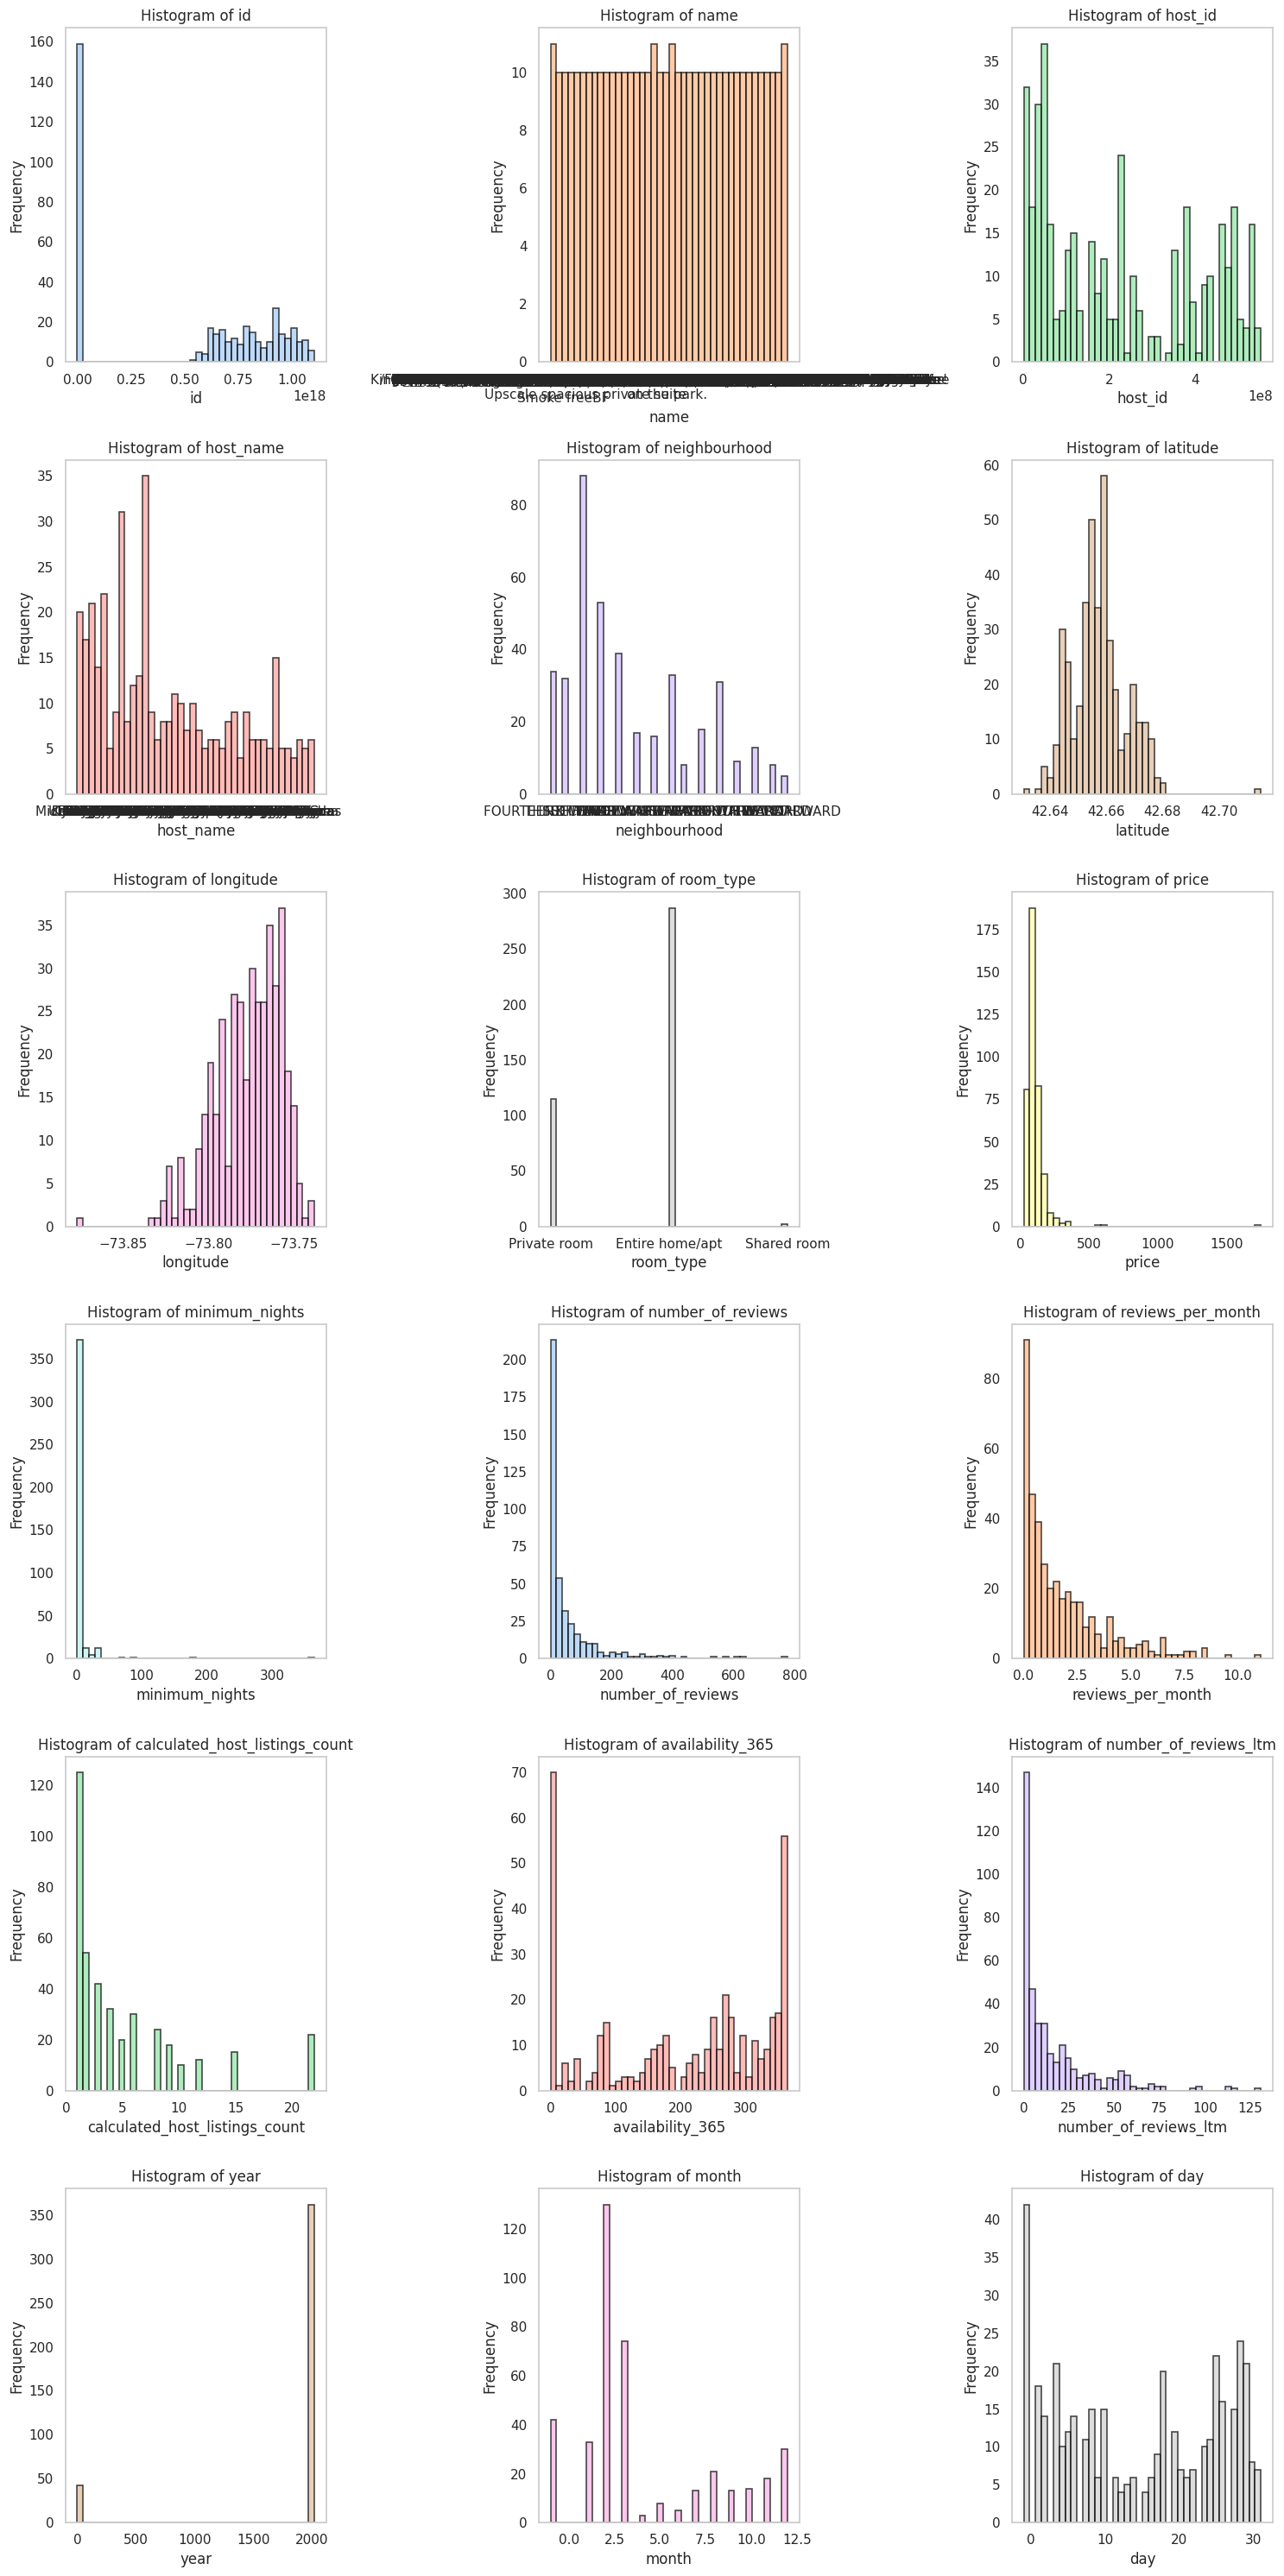

In [191]:
# distribution of each feature >>> existence of outlier & skewness
sns.set(style="whitegrid")
colors = sns.color_palette("pastel", n_colors=len(df.columns))
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    ax = axes[i]
    df[col].hist(bins=40, edgecolor='black', linewidth=1.2, grid=False, color=colors[i], alpha=0.7, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
for j in range(len(df.columns), num_rows * num_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


In [222]:
def detect_outliers(series):
    """
    Detect outliers in a pandas Series using the Interquartile Range (IQR) method.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Define the numerical columns
num_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
            'number_of_reviews_ltm']

# Calculate the number of outliers in each numerical column
outlier_counts = {col: detect_outliers(df[col]) for col in num_cols}
print("Number of outliers in each column:")
result = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)
print(result)

Number of outliers in each column:
[('minimum_nights', 50), ('number_of_reviews', 38), ('calculated_host_listings_count', 37), ('number_of_reviews_ltm', 32), ('price', 27), ('reviews_per_month', 21), ('latitude', 8), ('longitude', 1), ('availability_365', 0)]


In [225]:
# Define function to remove outliers from a column
def remove_outliers(column):
    min_value = column.min()
    max_value = column.max()
    return column[(column >= min_value) & (column <= max_value)]

# Apply the function to each column
cleaned_df = df.apply(remove_outliers)
